<a href="https://colab.research.google.com/github/woo-jungnam/TH-TTNT/blob/main/TUAN5_2001230540_NguyenThanhNam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

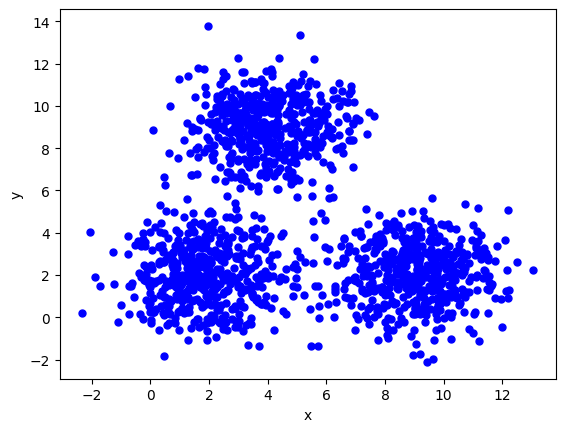

[[ 5.2269039  10.46171119]
 [ 3.53799964  8.73608345]
 [-0.50978986  3.41189253]]


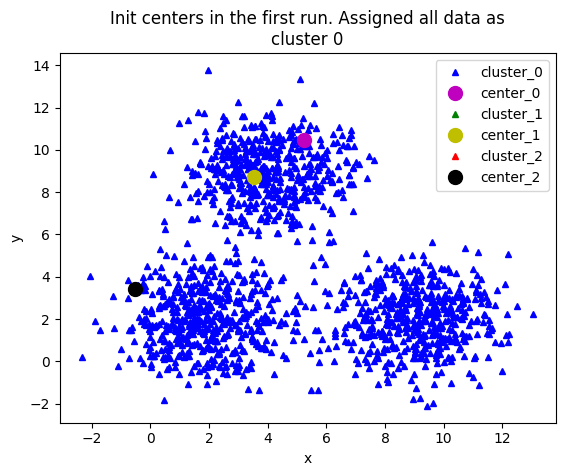

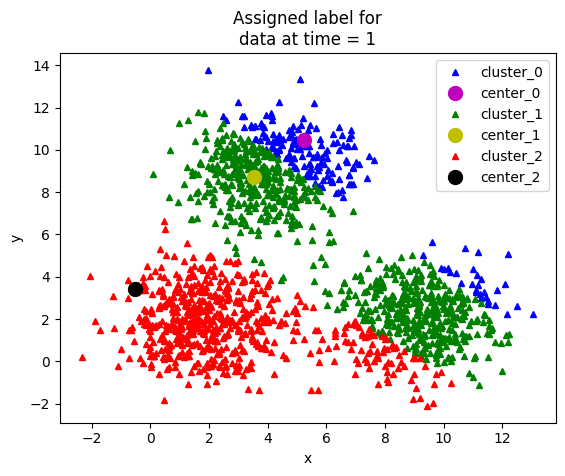

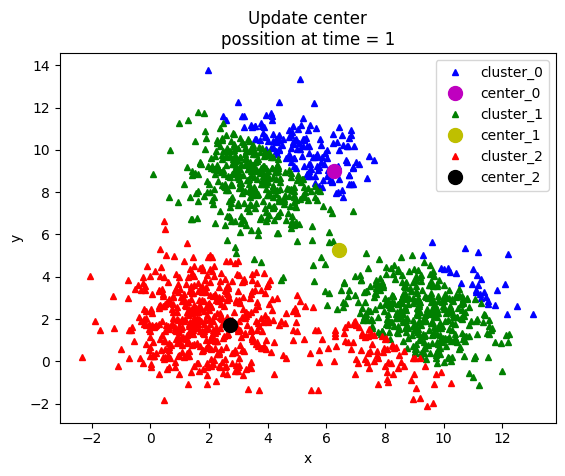

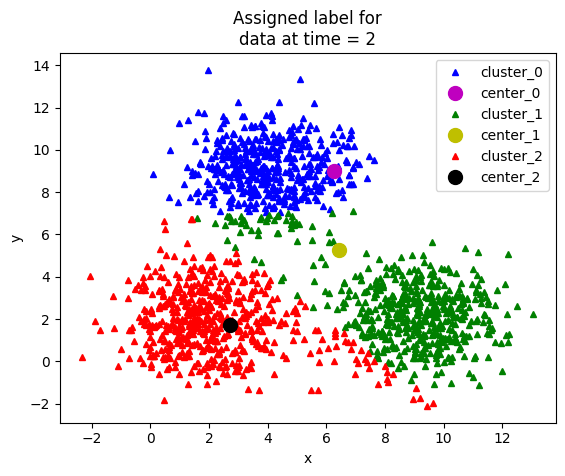

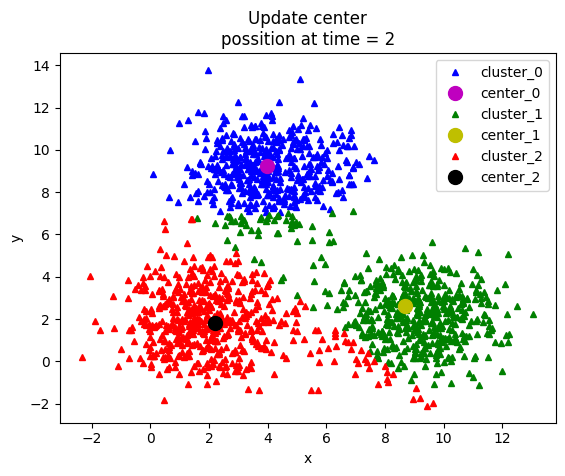

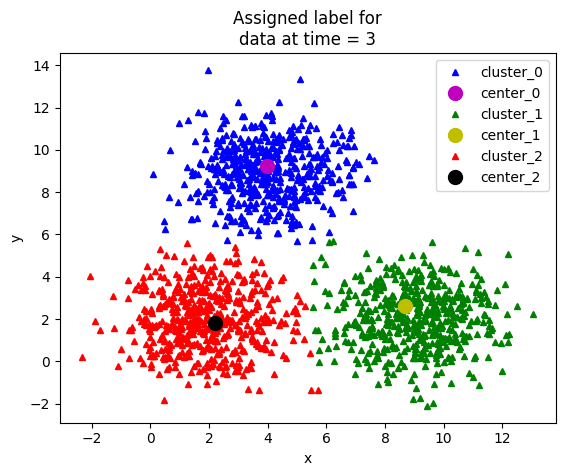

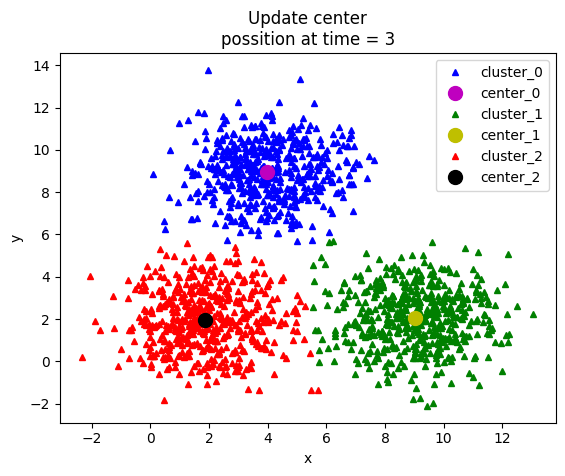

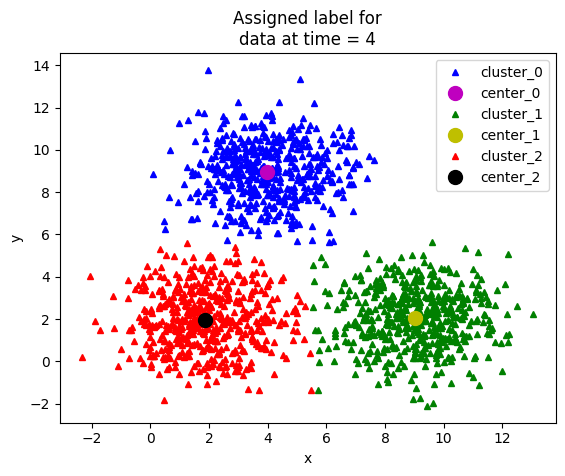

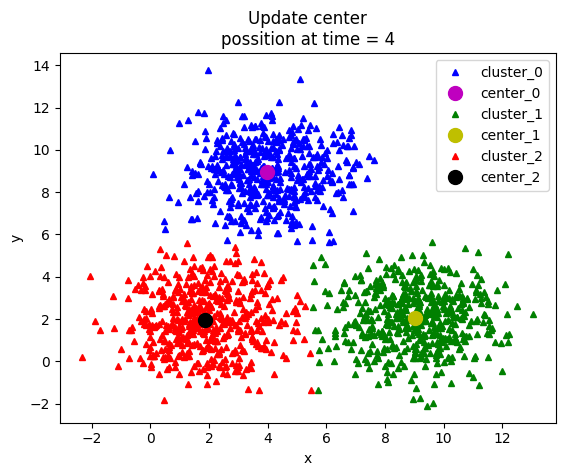

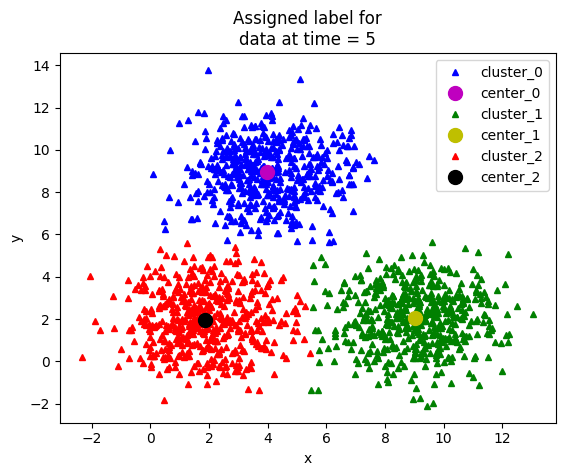

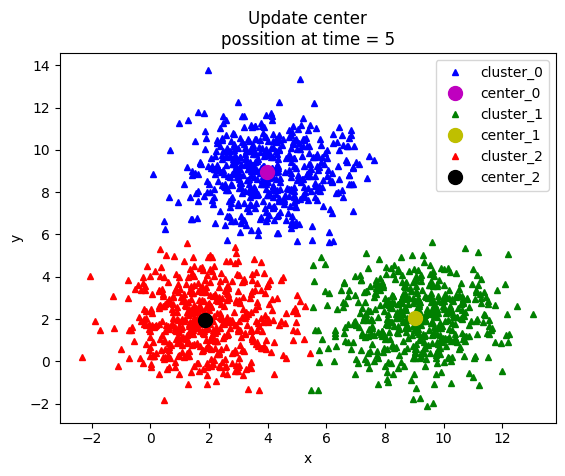

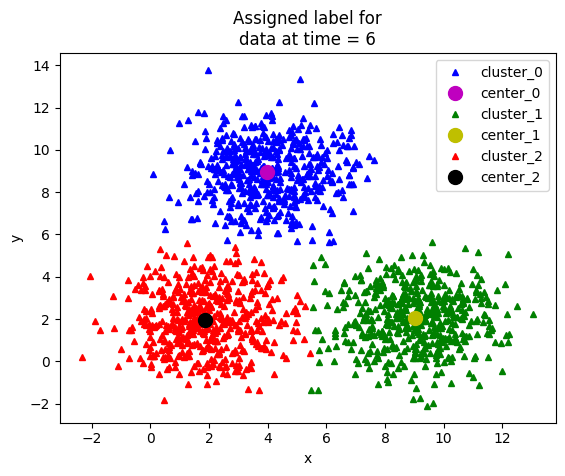

Done! Kmeans has converged after 5 times
[[3.97587557 8.96046174]
 [9.02648699 2.04392516]
 [1.86567524 1.96929169]]


In [8]:
import numpy as np # thư viện tính toán toán học
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách
means = [[2, 2], [9, 2], [4, 9]]

# BM KHDL&TTNT - This line was causing a SyntaxError and has been commented out.
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()
def kmeans_init_centers(X, n_cluster):
    # random k index beetween 0 and shape(X) without duplicate index.
    # Then return X[index] as cluster
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)
def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers
def kmeans_has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
            set([tuple(a) for a in new_centers]))
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x') # label trục x
    plt.ylabel('y') # label trục y
    plt.title(title) # title của đồ thị
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các
    # màu hỗ trợ
    for i in range(n_cluster):
        data = X[labels == i] # lấy dữ liệu của cụm i
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize=4,
                 label='cluster_' + str(i)) # Vẽ cụm i lên đồ thị
        plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o',
                 markersize=10,
                 label='center_' + str(i)) # Vẽ tâm cụm i lên đồ thị

    # BM KHDL&TTNT - This line was causing a SyntaxError and has been commented out.
    plt.legend() # Hiện bảng chú thích
    plt.show()
def kmeans(init_centes, init_labels, X, n_cluster):
    centers = init_centes
    labels = init_labels
    times = 0
    while True:
        labels = kmeans_predict_labels(X, centers)
        kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for\ndata at time = ' + str(times + 1))
        new_centers = kmeans_update_centers(X, labels, n_cluster)
        if kmeans_has_converged(centers, new_centers):
            break
        centers = new_centers
        kmeans_visualize(X, centers, labels, n_cluster, 'Update center\npossition at time = ' + str(times + 1))
        times += 1
    return (centers, labels, times)
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster,
'Init centers in the first run. Assigned all data as\ncluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
print('Done! Kmeans has converged after', times, 'times')
print(centers)

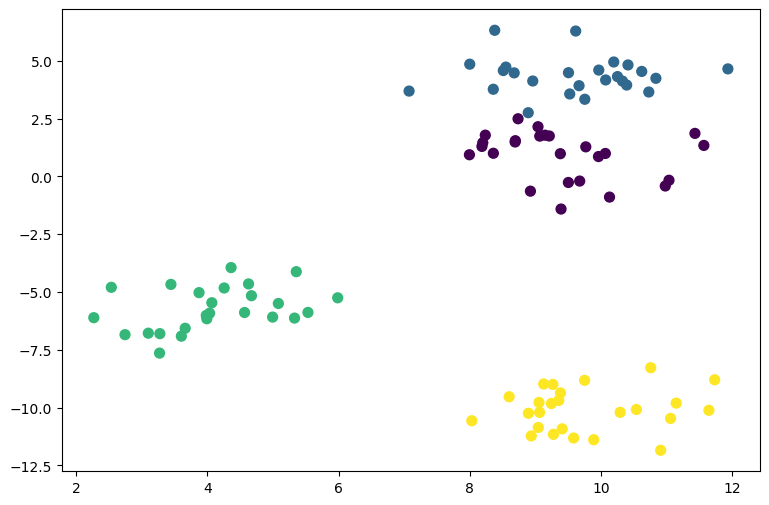

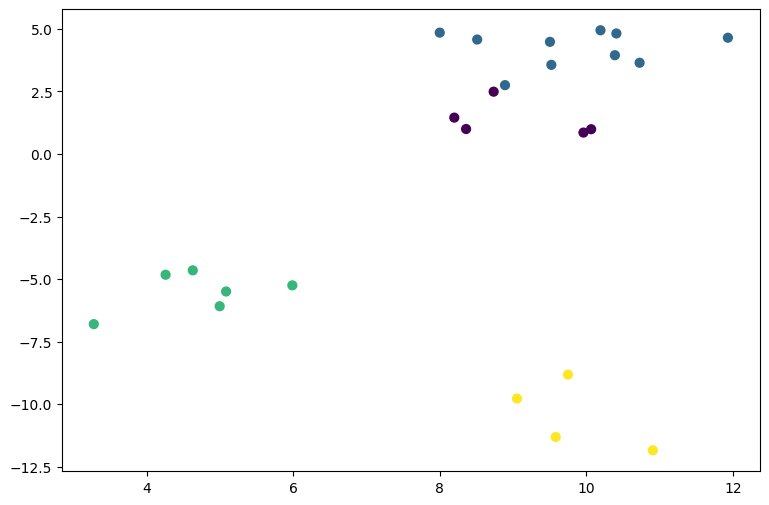

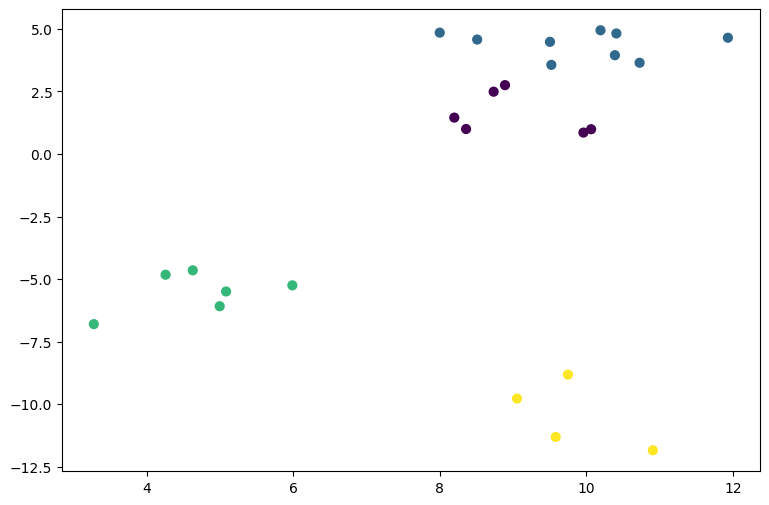

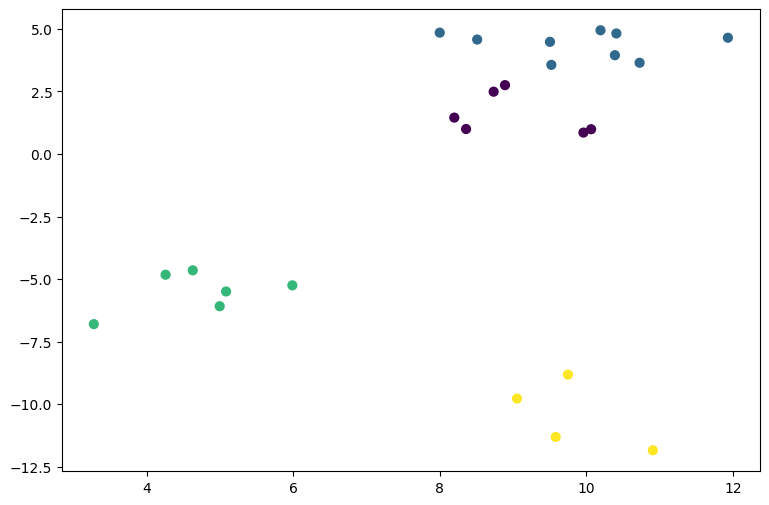

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # datavisualization
from sklearn.datasets import make_blobs # synthetic dataset
from sklearn.neighbors import KNeighborsClassifier # kNN classifier
from sklearn.model_selection import train_test_split # train and test
X,y = make_blobs(n_samples = 100, n_features = 2, centers = 4,
cluster_std = 1, random_state = 4)
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker= 'o', s=40)
plt.show()
knn5 = KNeighborsClassifier(5) # k=5
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= 'o', s=40)
plt.show()
knn1 = KNeighborsClassifier(1) # k=1
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= 'o', s=40)
plt.show()

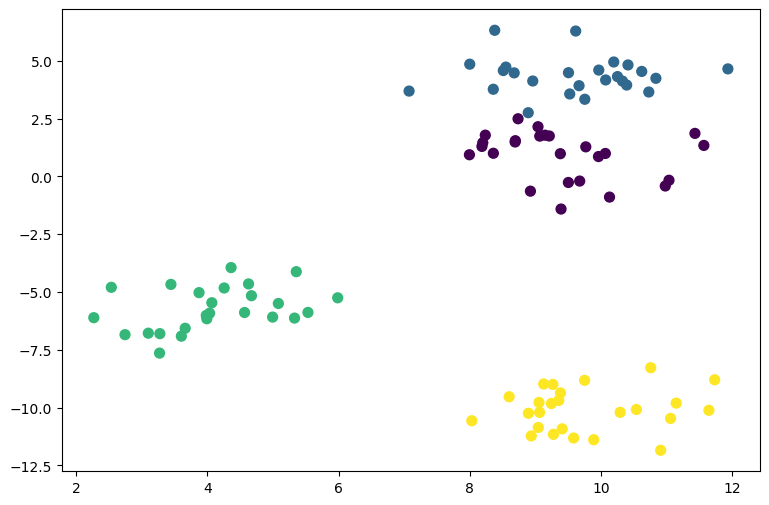

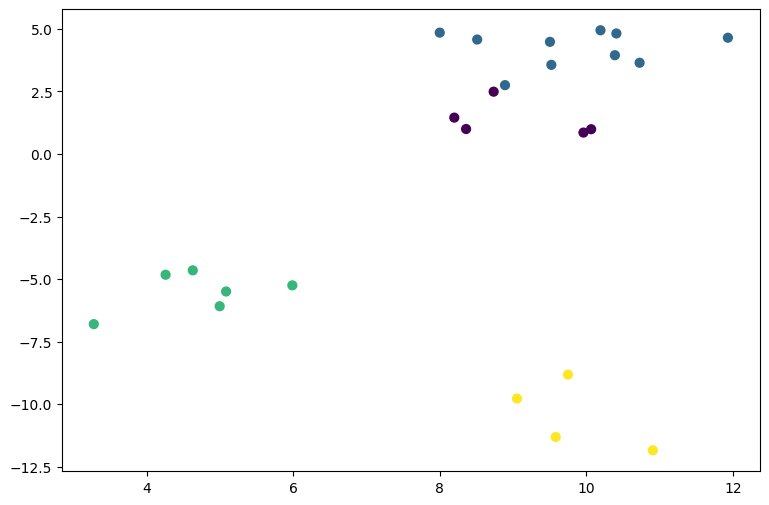

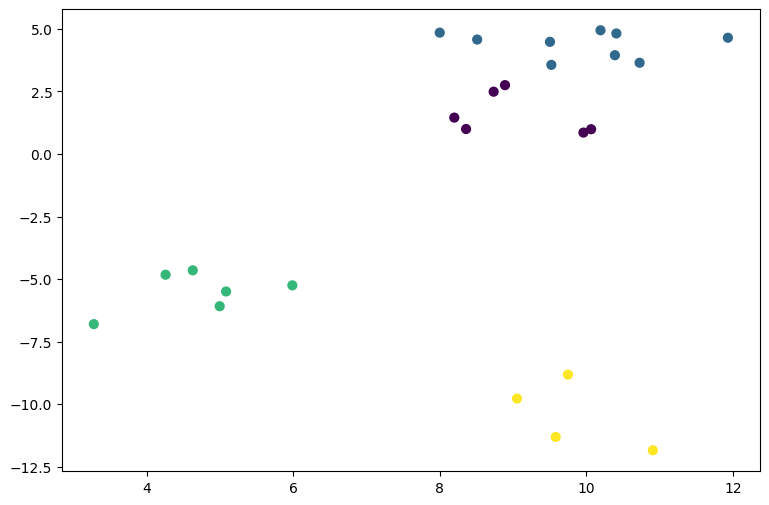

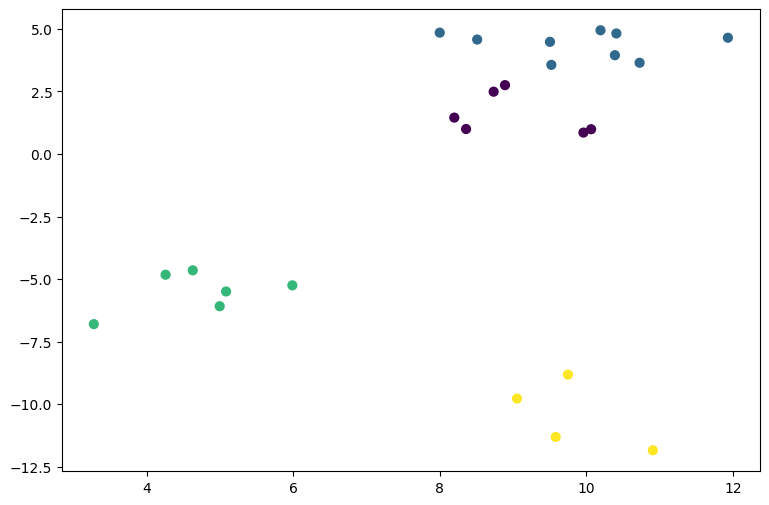

{'n_neighbors': np.int64(2)}


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # datavisualization
from sklearn.datasets import make_blobs # synthetic dataset
from sklearn.neighbors import KNeighborsClassifier # kNN classifier
from sklearn.model_selection import train_test_split # train and test
from sklearn.model_selection import GridSearchCV
X,y = make_blobs(n_samples = 100, n_features = 2, centers = 4,
cluster_std = 1, random_state = 4)
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker= 'o', s=40)
plt.show()
knn5 = KNeighborsClassifier(5) # k=5
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= 'o', s=40)
plt.show()
knn1 = KNeighborsClassifier(1) # k=1
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= 'o', s=40)
plt.show()
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
param_grid={'n_neighbors': np.arange(1,10)}, cv=5)
knn_grid.fit(X,y)
print (knn_grid.best_params_)